# Classification using KNN

## Pre-processing and Exploratory data analysis

### Scatterplot of independent variables in the dataset

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])

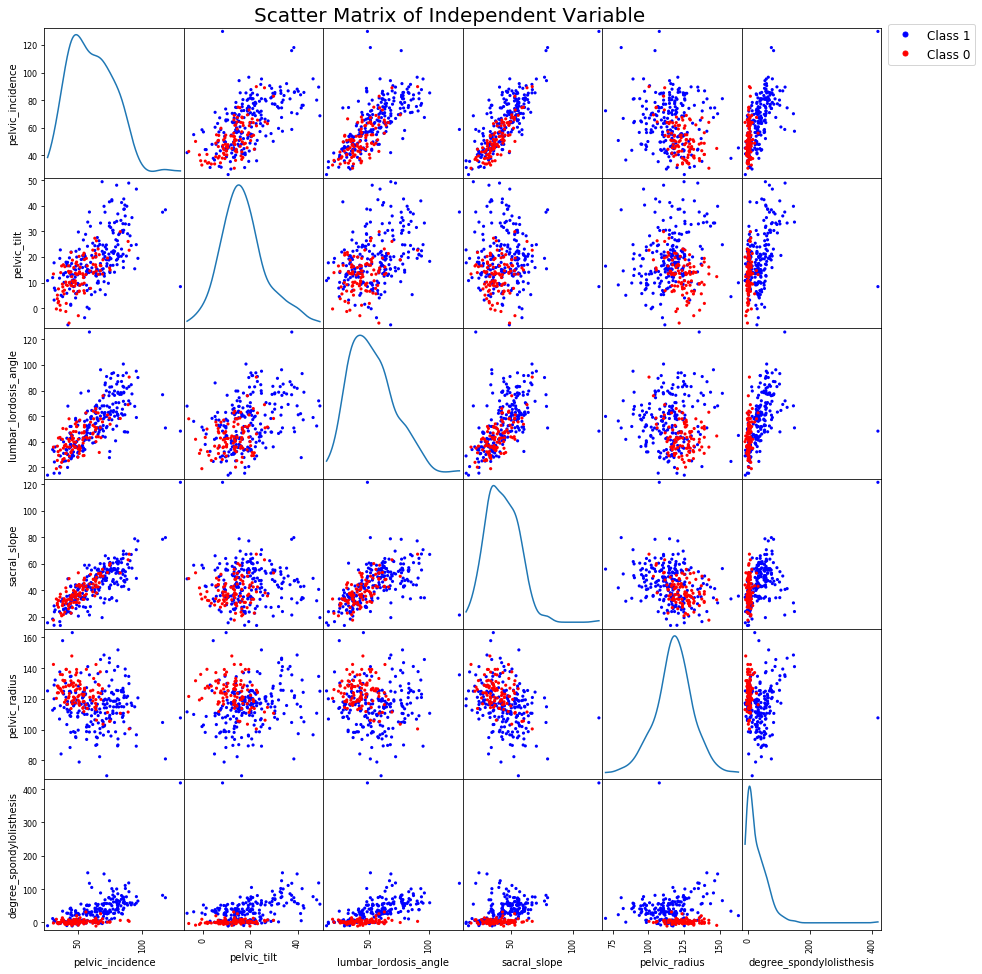

In [3]:
count = []
groups = []
total = 0

count = list(df['class'])  # Counting the number of entries in column 'class'

for i in range(len(count)):   # Appending 1 in list groups if found with label 'Abnormal' or else 0
    if count[i] == b'Abnormal':
        groups.append(1)
        total = total +1
    else:
        groups.append(0)     
    
# Plotting the scatter plot of independent variables in form of scatter matrix. Using colour (blue,red) to
# show class 0 & class 1

colors_palette = {0:"red", 1:"blue"}
colors = [colors_palette[c] for c in groups]   
pd.plotting.scatter_matrix(df, alpha=1, figsize=(15,15), color=colors, diagonal='kde', s=40)

# For plotting the legend 
handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", markersize=np.sqrt(100))[0] for i in range(2)]
labels=["Class 1", "Class 0"]
lgnd = plt.legend(handles, labels, loc=(1.05,5.75), fontsize = 12)
plt.suptitle("Scatter Matrix of Independent Variable", fontsize = 20)
plt.subplots_adjust(top = 0.96)
plt.show()

### Boxplot for each of the independent variables

In [4]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
total = 0
count = []

data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])
count = list(df['class'])

#Counting the number of labels with "Abnormal"
for i in range(len(count)):
    if count[i] == b'Abnormal':
        total = total + 1

In [5]:
# Seperating the columns of each feature
ab_col1 = list(df.loc[0:total, 'pelvic_incidence'])
n_col1 = list(df.loc[total:, 'pelvic_incidence'])
ab_col2 = list(df.loc[0:total, 'pelvic_tilt'])
n_col2 = list(df.loc[total:, 'pelvic_tilt'])
ab_col3 = list(df.loc[0:total, 'lumbar_lordosis_angle'])
n_col3 = list(df.loc[total:, 'lumbar_lordosis_angle'])
ab_col4 = list(df.loc[0:total, 'sacral_slope'])
n_col4 = list(df.loc[total:, 'sacral_slope'])
ab_col5 = list(df.loc[0:total, 'pelvic_radius'])
n_col5 = list(df.loc[total:, 'pelvic_radius'])
ab_col6 = list(df.loc[0:total, 'degree_spondylolisthesis'])
n_col6 = list(df.loc[total:, 'degree_spondylolisthesis'])

# Appending the feature columns corresponding to label "Abnormal"
ab_col = []
ab_col.append(ab_col1)
ab_col.append(ab_col2)
ab_col.append(ab_col3)
ab_col.append(ab_col4)
ab_col.append(ab_col5)
ab_col.append(ab_col6)

# Appending the feature columns corresponding to label "Normal"
n_col = []
n_col.append(n_col1)
n_col.append(n_col2)
n_col.append(n_col3)
n_col.append(n_col4)
n_col.append(n_col5)
n_col.append(n_col6)

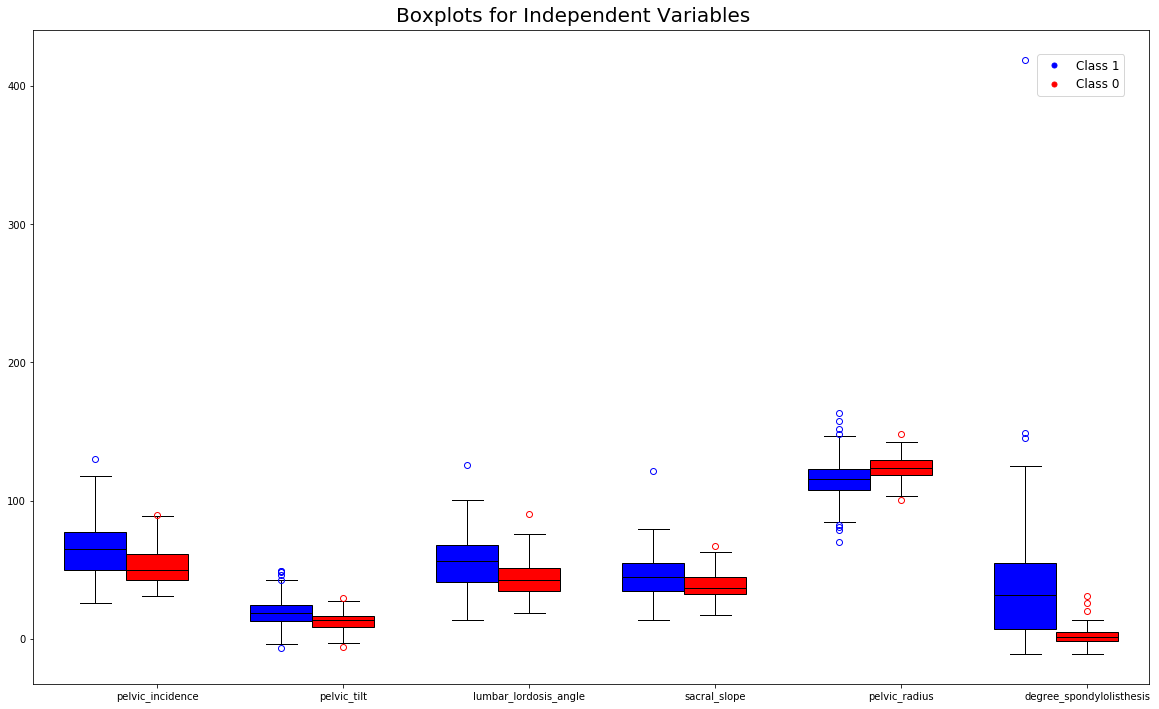

In [6]:
c2 = "blue"
c1 = 'black'
c3 = "red"
plt.figure(figsize=(20,11))

box1 = plt.boxplot(ab_col, positions=[2,3.5,5,6.5,8,9.5], patch_artist=True, labels = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c1)
plt.setp(box1["boxes"], facecolor=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)

box1 = plt.boxplot(n_col, positions=[2.5,4,5.5,7,8.5,10], patch_artist=True, labels = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c1)
plt.setp(box1["boxes"], facecolor=c3)
plt.setp(box1["fliers"], markeredgecolor=c3)

handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", markersize=np.sqrt(100))[0] for i in range(2)]
labels=["Class 1", "Class 0"]
lgnd = plt.legend(handles, labels, loc=(0.9,0.9), fontsize = 12)
plt.xlim(1.5,10.5)
plt.suptitle("Boxplots for Independent Variables", fontsize = 20)
plt.subplots_adjust(top = 0.95)
plt.show()

## Classification using KNN on Vertebral Column Data set

### Method 1 

### Using train_test_split method. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from matplotlib.pyplot import figure

In [8]:
data = pd.read_csv("column_2C_weka.csv")
df = pd.DataFrame(data)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [9]:
X = df.iloc[:, 0:6]
Y = df.loc[:, 'class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [18]:
# Initializing lists
test_error = []
train_error = []
min_test = []
k_star = 0
k_values = [x for x in range(1, 200, 1)]

# Loop for varying the k values and finding test * train error for plotting. 
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors= k, p=2, metric= 'euclidean')  # Instantiating the KNN model using sklearn
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    test_error.append(1- accuracy_score(y_test,y_pred)) #calculating test error
    train_error.append(1- accuracy_score(y_train,y_pred_train))
 
# Determining K* from test error
min_test= min(test_error)
print("Minimum Error is:", min_test)    
index1 = test_error.index(min_test)
k_star = 1+index1       # If the interval is 1, we can get k* by subtracting it with 208. 
print("Optimal K =", k_star)

Minimum Error is: 0.08064516129032262
Optimal K = 5


In [19]:
classifier = KNeighborsClassifier(n_neighbors=39, p=2, metric= 'euclidean')  #49 if interval is -3 and 3 if interval is -1
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Confusion Matrix calculation 
print("CONFUSION MATRIX TABLE: ")
print(" ")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)) 
print(" ")

# True Positive and True Negative Rate using confusion Matrix
con = confusion_matrix(y_test, y_pred)
tpr = float(con[0][0] / (con[0][0] + con[0][1]))
print("TRUE POSITIVE RATE:", tpr)
tnr = float(con[1][1] / (con[1][1] + con[1][0]))
print("TRUE NEGATIVE RATE:", tnr)
print("")

#Classificiation Report which includes F-1 score and Precision
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test,y_pred))


CONFUSION MATRIX TABLE: 
 
Predicted  Abnormal  Normal  All
True                            
Abnormal         39       6   45
Normal            6      11   17
All              45      17   62
 
TRUE POSITIVE RATE: 0.8666666666666667
TRUE NEGATIVE RATE: 0.6470588235294118

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

    Abnormal       0.87      0.87      0.87        45
      Normal       0.65      0.65      0.65        17

    accuracy                           0.81        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.81      0.81      0.81        62



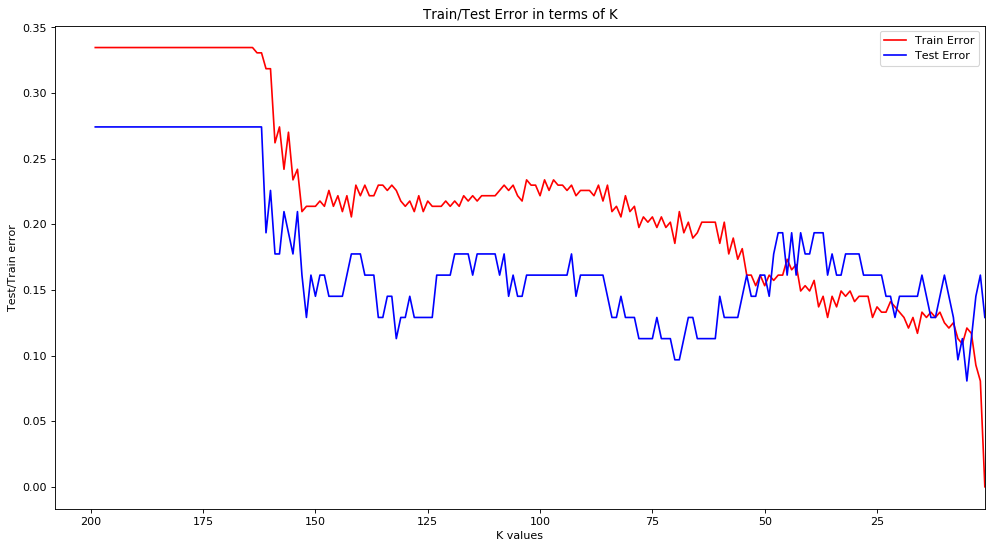

In [20]:
figure(num=None, figsize=(15,8), dpi=80)
fig = plt.plot(k_values,train_error, color='red',label='Train Error')
fig = plt.plot(k_values,test_error, color='blue',label='Test Error')
plt.xlim([208, 1])
plt.xlabel('K values')
plt.ylabel('Test/Train error')
plt.title('Train/Test Error in terms of K')
plt.legend()

## Method 2 
### Splitting by selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training and the rest of the data as the test set

In [21]:
train_ab= df.iloc[0:140, 0:7]
train_n = df.iloc[210:280, 0:7]
train = pd.concat([train_ab, train_n]) # train - DataFrame with training data

test_ab = df.iloc[140:210, 0:7]
test_n = df.iloc[280:310, 0:7]
test = pd.concat([test_ab, test_n]) # test - DataFrame with test data

In [22]:
# Dividing the data into x_train(features), x_test(labels), y_train(features), y_test(label)

x_train = train.iloc[:, 0:6]
y_train = train.loc[:, 'class']
x_test = test.iloc[:, 0:6]
y_test = test.loc[:, 'class']

# Shuffling the data
x_train = shuffle(x_train, random_state = 7)
x_test = shuffle(x_test, random_state = 7)
y_train = shuffle(y_train, random_state = 7)
y_test = shuffle(y_test, random_state = 7)

In [26]:
 # Initializing lists
test_error = []
min_test = []
train_error = []
k_star = 0
k_values = [x for x in range(1, 200, 1)]

# Loop for varying the k values and finding test * train error for plotting. 
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors= k, p=2, metric= 'euclidean')  # Instantiating the KNN model using sklearn
    classifier.fit(x_train,y_train)
    y_pred_test = classifier.predict(x_test)
    y_pred_train = classifier.predict(x_train)
    test_error.append(1- accuracy_score(y_test,y_pred_test))
    train_error.append(1- accuracy_score(y_train,y_pred_train))

 
# Determining K* from test error
min_test= min(test_error)
print("Minimum Error is:", min_test)    
index1 = test_error.index(min_test)
k_star = 1+index1          # If the interval is 1, we can get k* by subtracting it with 208. 
print("Optimal K =", k_star)

Minimum Error is: 0.07999999999999996
Optimal K = 3


In [27]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric= 'euclidean')  #49 if interval is -3 and 3 if interval is -1
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#Confusion Matrix calculation 
print("CONFUSION MATRIX TABLE: ")
print(" ")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)) 
print(" ")

# True Positive and True Negative Rate using confusion Matrix
con = confusion_matrix(y_test, y_pred)
tpr = float(con[0][0] / (con[0][0] + con[0][1]))
print("TRUE POSITIVE RATE:", tpr)
tnr = float(con[1][1] / (con[1][1] + con[1][0]))
print("TRUE NEGATIVE RATE:", tnr)
print("")

#Classificiation Report which includes F-1 score and Precision
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test,y_pred))


CONFUSION MATRIX TABLE: 
 
Predicted  Abnormal  Normal  All
True                            
Abnormal         69       1   70
Normal            7      23   30
All              76      24  100
 
TRUE POSITIVE RATE: 0.9857142857142858
TRUE NEGATIVE RATE: 0.7666666666666667

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

    Abnormal       0.91      0.99      0.95        70
      Normal       0.96      0.77      0.85        30

    accuracy                           0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



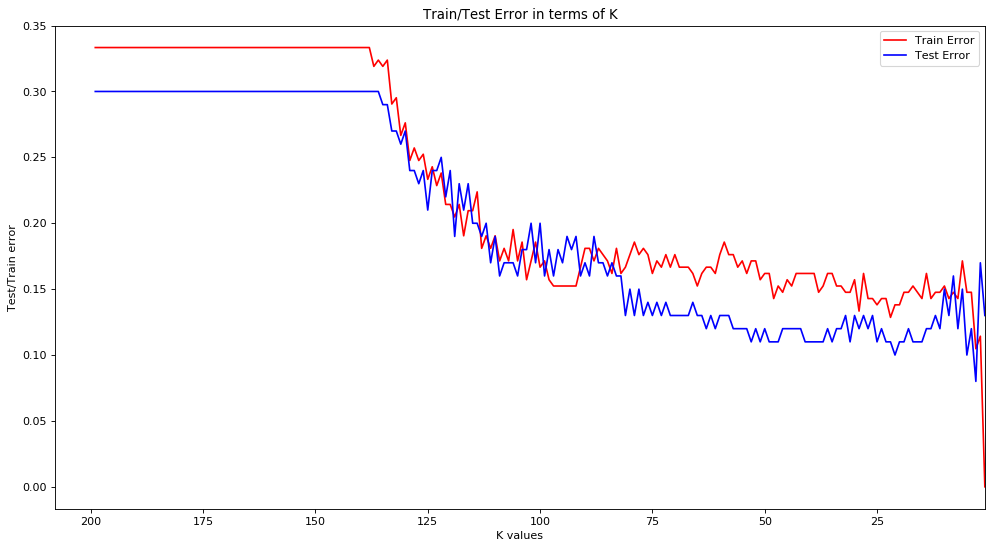

In [28]:
figure(num=None, figsize=(15,8), dpi=80)
fig = plt.plot(k_values,train_error, color='red',label='Train Error')
fig = plt.plot(k_values,test_error, color='blue',label='Test Error')
plt.xlim([208, 1])
plt.xlabel('K values')
plt.ylabel('Test/Train error')
plt.title('Train/Test Error in terms of K')
plt.legend()